In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from relaynet import RelayNet
from data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/magnus/Documents/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

Train size: 88
Test size: 22


In [5]:
relay_net = RelayNet(dropout_prob=0)
relay_net.load_state_dict(torch.load('models/model-89.model'))
relay_net = relay_net.cuda()

/home/magnus/Documents/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


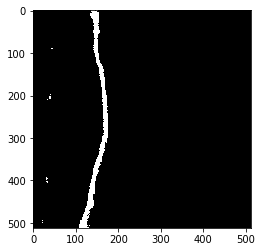

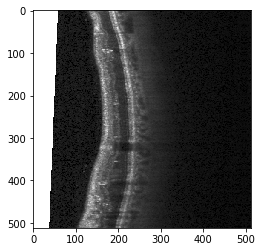

In [6]:
out = relay_net(Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True))
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = np.squeeze(idx==2)
plt.imshow(idx)
plt.show()

img_test = test_data.X[11:12]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()

In [9]:
relay_net = RelayNet(dropout_prob=0.3)
relay_net.load_state_dict(torch.load('models_dropout/model-89.model'))
relay_net = relay_net.cuda()

In [11]:
out = relay_net.predict(Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True))
out

/home/magnus/Documents/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


[array([[[[1.18577387e-03, 9.82421334e-05, 1.47576633e-04, ...,
           2.33088635e-04, 2.55728897e-04, 3.66232125e-04],
          [4.50712905e-05, 1.38810856e-06, 2.16418675e-06, ...,
           5.78629770e-05, 7.58278547e-05, 1.66875063e-04],
          [9.24773758e-06, 4.54603310e-07, 1.14031343e-06, ...,
           4.42661694e-05, 5.51665617e-05, 1.54995651e-04],
          ...,
          [1.41158846e-04, 7.76233937e-05, 1.64367841e-04, ...,
           1.69528867e-05, 2.28928875e-05, 5.36101943e-05],
          [1.14017654e-04, 7.43638611e-06, 1.14125467e-03, ...,
           2.29099187e-05, 2.49476834e-05, 5.56335617e-05],
          [3.53146432e-04, 1.06181440e-04, 1.38376385e-03, ...,
           1.22007943e-04, 1.26369225e-04, 2.60627654e-04]],
 
         [[9.52963829e-01, 9.97845769e-01, 9.98190820e-01, ...,
           1.36895070e-03, 3.84085486e-03, 8.71472247e-03],
          [9.99849319e-01, 9.99990940e-01, 9.99974012e-01, ...,
           2.73553946e-04, 1.07492437e-03, 4.74002